In [4]:
import sys
import cv2
import numpy as np

import joblib

import matplotlib.pyplot as plt
sys.path.append('../')
from utils import data

In [5]:
model_filename = 'kmeans_model.joblib'
kmeans_loaded = joblib.load(model_filename)



In [6]:
def process_img(img):
    orb=cv2.ORB_create(100)
    feats=cv2.goodFeaturesToTrack(np.mean(img,axis=2).astype(np.uint8),3000,qualityLevel=0.01,minDistance=3)
    kps=[cv2.KeyPoint(x=f[0][0],y=f[0][1],size=20) for f in feats]
    kps,des=orb.compute(img,kps)
    return des

def descriptor(image,dataset_path):
      global kmeans_loaded
      # for i in range(10):
      frame=cv2.imread(dataset_path+image)      
      des=process_img(frame)
      labels = kmeans_loaded.predict(des)
      print(kmeans_loaded.labels_)
      hist, edges = np.histogram(labels, bins=kmeans_loaded.n_clusters)

      print(hist)
        # Plot histogram
      # plt.hist(hist, bins=150)
      plt.bar(edges[:-1], hist, width=np.diff(edges), edgecolor='black')
      plt.title('Histogram of Random Data')
      plt.xlabel('Values')
      plt.ylabel('Frequency')
      plt.show()


      print("predicted labels:", labels)



        

In [3]:
import numpy as np
a=[2,3,4]
b=[2,3,4]
np.multiply(a,b)

array([ 4,  9, 16])

In [7]:
def update_kmean(dataset_path,i):
    global kmeans
    
    rgb_paths=dataset_path+'rgb.txt'
    
    image_list=data(rgb_paths)
    
    if image_list is None:
        return
    
    des_array=descriptor(image_list[i],dataset_path)

[271 671 519 ... 354 399 447]
[  1   3   0   3   4   2   0   1   3   1   2   4   9   3   5   4   6   0
   5   1   7  30   2   0   2  12   0   3   2   5   7   1   0   3   6   8
   3   2   4   1   4   0   6   5   3   2   1   0   0   4   1   4   0   2
   3   3   1   1   1   0   7   1   0   4   2   5   3   1   0   2   3   0
   3   1   0   0   2   2   3   0   2   3   0   8   3   6   6   0   0   3
   3   5   6   0   2   3   0   2   0   1   1   4   0   2   6   0   1  31
   2   2   1   4   1   0   1   4   0   0   0   2   1   1   2   2   0   5
   3   3   0   1   9   2   0   1   1   0  14   9   1   5   2   0   1   0
   7   1   3   6   5   4   0   0   0   0   4   3   2   4   2   2   1   1
   3   1   1   3   3   0   3   1   3   0   3   0  13   0   1   1   2   2
   2   1   1   1   1   0   2   6   2   4   3   2  10   0   2   2   7   3
   0   0   2   3   3   4   0  11   1   0   1   2   2   8   1   2   0   0
   1   3   0   3   0   6   0   1   0   4   0   0  11  11   2   1   1   0
   1   1   2   9   0 

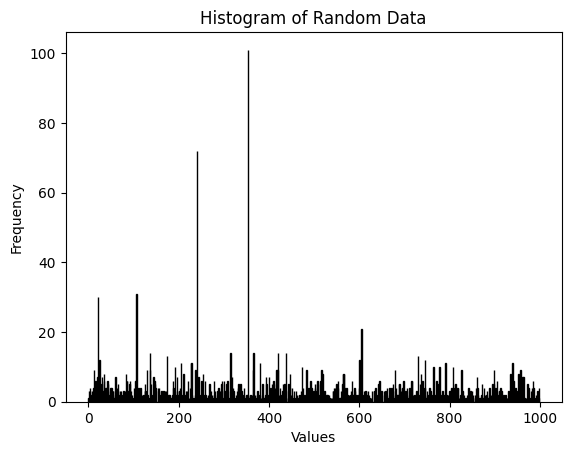

predicted labels: [ 81 483 892 ... 939 606 404]


In [8]:
dataset_path='../../dataset/rgbd_dataset_freiburg1_floor/'

update_kmean(dataset_path,100)

In [ ]:
dataset_path1='../../dataset/rgbd_dataset_freiburg1_floor/'
update_kmean(dataset_path1)
dataset_path2='../../dataset/rgbd_dataset_freiburg1_xyz/'
update_kmean(dataset_path2)
dataset_path3='../../dataset/rgbd_dataset_freiburg2_floor/'
update_kmean(dataset_path3)
dataset_path4='../../dataset/rgbd_dataset_freiburg2_floor/'
update_kmean(dataset_path4)



In [9]:
import sys
for thing in sys.argv:
    print(thing,end='')


/home/sujan/.local/lib/python3.8/site-packages/ipykernel_launcher.py--f=/home/sujan/.local/share/jupyter/runtime/kernel-v2-45147FtVh6O6L3Tc.json